Imports

In [7]:
#importieren der Module 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ezodf
import matplotlib.patches as mpatches
from scipy import stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as snsudierende 
from matplotlib.legend import Legend

Daten 

In [8]:
# Importiere Daten
file_ma = '/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/sub_combined.ods'
dm = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/Musik_run1_2.csv', header = 0, usecols = [0])
dm.loc[:,('Musik_r1_2\t')].astype(float)
dm = dm.dropna()
dw = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/sound_run1_2.csv', header = 0, usecols = [0])
dw.loc[:,('sound_run1_2')].astype(float)
dw = dw.dropna()
dwm = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/musik_sound_r1_2.csv', header = 0, usecols = [0])
dwm.loc[:,('musik_sound_r1_2')].astype(float)
dwm = dwm.dropna()
dmr1 = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/m_r1_mean.csv', header = 0, usecols = [0])
dmr1.loc[:,('m_r1_mean')].astype(float)
dmr1 = dmr1.dropna()
dwr1 = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/s_r1_mean.csv', header = 0, usecols = [0])
dwr1.loc[:,('s_r1_mean')].astype(float)
dwr1 = dwr1.dropna()
dmr2 = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/m_r2_mean.csv', header = 0, usecols = [0])
dmr2.loc[:,('m_r2_mean')].astype(float)
dmr2 = dmr2.dropna()
dwr2 = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/sr2_mean.csv', header = 0, usecols = [0])
dwr2.loc[:,('sr2_mean')].astype(float)
dwr2 = dwr2.dropna()
time = pd.read_csv('/home/jan/Documents/01_doktorarbeit_1/Daten/physio_resp_pulse/physio_sub_version/time.csv', header = 0, usecols = [0])
time.loc[:,('time')].astype(float)

mean_m = dm.mean(axis = None, skipna=None, level=None, numeric_only=None)
std_m = dm.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)
mean_w = dw.mean(axis = None, skipna=None, level=None, numeric_only=None)
std_w = dw.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)
mean_mw = dwm.mean(axis = None, skipna=None, level=None, numeric_only=None)
std_mw = dwm.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

log_dwm = np.log(dwm['musik_sound_r1_2'])
sqrt_dwm = np.sqrt(dwm['musik_sound_r1_2'])

In [9]:
# Erzeugen eines DataFrames
doc_ma = ezodf.opendoc(file_ma)

print("Spreadsheet contains %d sheet(s)." % len(doc_ma.sheets))
for sheet in doc_ma.sheets:
    print("-"*40)
    print("   Sheet name : '%s'" % sheet.name)
    print("Size of Sheet : (rows=%d, cols=%d)" % (sheet.nrows(), sheet.ncols()) )

# convert the first sheet to a pandas.DataFrame
sheet_ma = doc_ma.sheets[0]
df_dict_ma = {}
for i, row in enumerate(sheet_ma.rows()):
    # row is a list of cells
    # assume the header is on the first row
    if i == 0:
        # columns as lists in a dictionary
        df_dict_ma = {cell.value:[] for cell in row}
        # create index for the column headers
        col_index_ma = {j:cell.value for j, cell in enumerate(row)}
        continue
    for j, cell in enumerate(row):
        # use header instead of column index
        df_dict_ma[col_index_ma[j]].append(cell.value)
# and convert to a DataFrame
df_ma = pd.DataFrame(df_dict_ma)

Spreadsheet contains 1 sheet(s).
----------------------------------------
   Sheet name : 'Sheet1'
Size of Sheet : (rows=501, cols=50)


In [10]:
df_ma

,Mittelwert_1,Mittelwert_2,P23:1,P23:2,p10:1,p10:2,p11:1,p11:2,p12:1,p12:2,...,p3:1,p3:2,p5:1,p5:2,p6:1,p6:2,p7:1,p7:2,p9:1,p9:2
0,76.020822,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
1,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
2,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
3,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
4,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
5,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
6,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
7,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
8,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990
9,73.096944,78.833067,73.68065,79.55556,83.26290,82.72886,86.90517,88.08333,105.10610,97.45565,...,52.59048,52.47458,81.09850,93.00000,64.71939,60.97959,82.15667,80.61538,66.02616,58.52990


In [11]:
# extrahieren der Daten für die einzelnen Stressphasen und bilden eines Mittelwertes
prob = [c for c in df_ma.columns if c.startswith('p')]
prob1 = [p for p in prob if p.endswith(':1')]
prob2 = [p for p in prob if p.endswith(':2')]
# Maximaler Mittelwert Unterschied Exel vs. python  
pandas_diff_excel = df_ma[prob2].mean(axis=1) - df_ma.Mittelwert_2
pandas_diff_excel.abs().max()

0.42746378623192527

In [12]:
#baseline und z-score Korrektur
df_mb = df_ma[prob1 + prob2].copy()
df_mb = (df_mb - df_mb.mean(axis=0))
df_mc = (df_mb - df_mb.mean(axis=0)) / df_mb.std(axis=0) # z-score: normalize with respect to standard deviation
df_mb

,p10:1,p11:1,p12:1,p13:1,p14:1,p15:1,p16:1,p17:1,p19:1,p20:1,...,p26:2,p27:2,p28:2,p29:2,p2:2,p3:2,p5:2,p6:2,p7:2,p9:2
0,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
1,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
2,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
3,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
4,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
5,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
6,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
7,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
8,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
9,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629


In [13]:
# Kontrolle der baseline Korrektur
df_mb.mean(axis=0).abs().max()

1.2585132935782894e-13

Plots der Rohdaten 

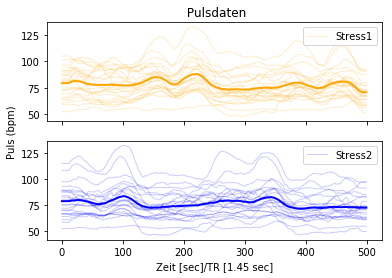

In [14]:
#Methode um Pulsdaten in den zwei Stressblöcken zu plotten 
def plot_puls(prob1,label, df=df_ma, color="orange", ax=None, lw1=1):
    ax1 = df[prob1].plot(legend=None, color=color, alpha=0.2, linewidth=lw1, ax=ax)
    df[prob1].mean(axis=1).plot(label=label, linewidth=2, color=color, ax=ax1)
    return ax1

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
plot_puls(prob1,"Stress1",ax=ax1)
plot_puls(prob2,"Stress2", color="blue", ax=ax2)
ax2.legend(["Stress2"])
ax1.legend(["Stress1"], loc= 'upper right')
plt.xlabel("Zeit [sec]/TR [1.45 sec]")
ax1.set_title (" Pulsdaten")
fig.text(0.045, 0.5, 'Puls (bpm)', ha='center', va='center', rotation='vertical')
plt.savefig("puls_XXX.pdf")

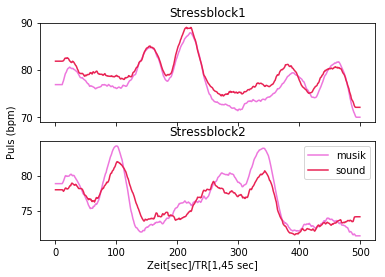

In [15]:
# plot der Stressphasen für die Gruppen Musik und Sound
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')

get_ipython().magic(u'matplotlib inline')
fig, (ax1,ax2) = plt.subplots(2, sharex=True)
ax2.plot(dmr2, label='musik', color = '#ed77dd')
ax2.plot(dwr2, label='sound', color = '#e82354')
ax1.plot(dmr1, label='musik', color = '#ed77dd')
ax1.plot(dwr1, label='sound', color = '#e82354')
plt.legend()
ax1.set_title('Stressblock1')
ax2.set_title('Stressblock2')
ax1.set_label('Stressblock1')
ax2.set_label('Stressblock2')

fig.text(0.5, 0.04, 'Zeit[sec]/TR[1,45 sec]', ha='center', va='center')
fig.text(0.06, 0.5, 'Puls (bpm)', ha='center', va='center', rotation='vertical')
plt.savefig('stressblock1')

In [16]:
# Definiere Phasen der Stressblöcke 
phases = [
    (4, 106.206896552),
    (125.517241379, 227.586206897),
    (246.896551724, 348.965517241),
    (368.275862069, 470.344827586),
]
#Methode zum Zugriff auf die Stress und Entspannungsphasen des Experiments
def plot_phases(colors=['0.3', '0.9'], alpha=0.06):
    for i, phase in enumerate(phases):
        plt.axvspan(phase[0], phase[1], facecolor=colors[i % 2], alpha=alpha)

TypeError: unsupported operand type(s) for *: 'AxesSubplot' and 'float'

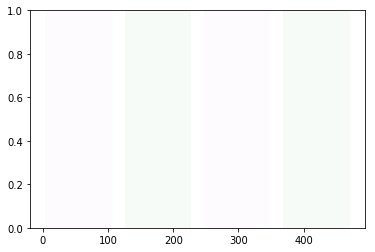

In [62]:

#Pulsdaten der Stressblöcke 1 und 2, dargestellt in den verschiedenen Stress und Entspannungsphasen.
plot_phases(colors=["violet", "green"], alpha=0.03)
ax1 = plot_puls(prob1, "Stress1", color="blue", ax=plt.gca(), df=df_mb, lw1=0.5)
plot_puls(prob2, "Stress2", color="orange", ax=ax1, df=df_mb, lw1=0.5)
plt.xlabel("Zeit [sec]/ TR [1.45 sec]")
plt.text(15, -17.5, 'Phase', fontsize = 10) 
plt.text(67, -17.5, 'a/', fontsize = 10, color = 'blue') 
plt.text(82, -17.5, 'a`', fontsize = 10, color = 'orange') 
plt.text(140, -17.5, 'Phase ', fontsize = 10)
plt.text(190, -17.5, 'b/', fontsize = 10, color = 'blue') 
plt.text(207, -17.5, 'b`', fontsize = 10, color = 'orange') 
plt.text(260, -17.5, 'Phase ', fontsize = 10) 
plt.text(312, -17.5, 'c/', fontsize = 10, color = 'blue') 
plt.text(327, -17.5, 'c`', fontsize = 10, color = 'orange') 
plt.text(380, -17.5, 'Phase ', fontsize = 10)
plt.text(430, -17.5, 'd/', fontsize = 10, color = 'blue') 
plt.text(446, -17.5, 'd`', fontsize = 10, color = 'orange') 
plt.ylabel('Puls(bpm) to baseline')
plt.title('Pulsdaten baseline korrigiert')
plt.savefig("puls_mb.pdf")

In [58]:
df_mb

,p10:1,p11:1,p12:1,p13:1,p14:1,p15:1,p16:1,p17:1,p19:1,p20:1,...,p26:2,p27:2,p28:2,p29:2,p2:2,p3:2,p5:2,p6:2,p7:2,p9:2
0,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
1,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
2,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
3,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
4,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
5,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
6,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
7,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
8,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629
9,2.806465,5.984299,7.744249,8.617489,-2.105359,-3.313461,5.141416,6.595176,-9.33351,9.530792,...,-1.374795,-1.298127,3.830621,-1.100847,2.267973,-1.711291,13.383284,5.02028,1.042276,-5.265629


In [41]:
time

,time
0,0.00
1,1.45
2,2.90
3,4.35
4,5.80
5,7.25
6,8.70
7,10.15
8,11.60
9,13.05


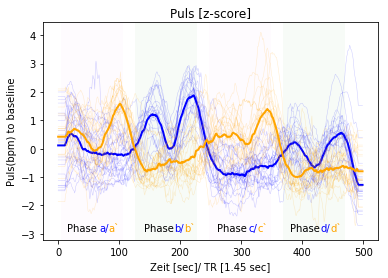

In [18]:
#Pulsdaten der Stressblöcke 1 und 2, dargestellt in den verschiedenen Stress und Entspannungsphasen.
#baseline und z-score korrigiert
plot_phases(colors=["violet", "green"], alpha=0.03)
ax1 = plot_puls(prob1, "Stress1", color="blue", ax=plt.gca(), df=df_mc, lw1=0.5)
plot_puls(prob2, "Stress2", color="orange", ax=ax1, df=df_mc, lw1=0.5)

plt.xlabel("Zeit [sec]/ TR [1.45 sec]")
plt.text(15, -2.9, 'Phase', fontsize = 10) 
plt.text(67, -2.9, 'a/', fontsize = 10, color = 'blue') 
plt.text(82, -2.9, 'a`', fontsize = 10, color = 'orange') 
plt.text(140, -2.9, 'Phase ', fontsize = 10)
plt.text(190, -2.9, 'b/', fontsize = 10, color = 'blue') 
plt.text(207, -2.9, 'b`', fontsize = 10, color = 'orange') 
plt.text(260, -2.9, 'Phase ', fontsize = 10) 
plt.text(312, -2.9, 'c/', fontsize = 10, color = 'blue') 
plt.text(327, -2.9, 'c`', fontsize = 10, color = 'orange') 
plt.text(380, -2.9, 'Phase ', fontsize = 10)
plt.text(430, -2.9, 'd/', fontsize = 10, color = 'blue') 
plt.text(446, -2.9, 'd`', fontsize = 10, color = 'orange') 
plt.ylabel('Puls(bpm) to baseline')
plt.title('Puls [z-score]')
plt.savefig("puls_mc.pdf")

In [19]:
# Zugriff auf Mittelwerte der Stressphase 1 (phase_mean1)
phase_mean1 = [
    df_mb.loc[range(int(p[0]), int(p[1]))][prob1].mean(axis=0).mean()
    for p in phases
]
# Zugriff auf Mittelwerte der Stressphase 2 (phase_mean2)
phase_mean2 = [
    df_mb.loc[range(int(p[0]), int(p[1]))][prob2].mean(axis=0).mean()
    for p in phases
]
phase_mean1
phase_mean2

[2.784618362131275, -2.4531011135720493, 3.0736957662233464, -3.65662431476557]

In [20]:
def plot_mean_phases(phase_mean1=phase_mean1, color="orange"):
    """Methode zum Plotten der Mittelwerte der Stress und Entspannungsphasen"""
    for i, mid in enumerate(phase_mean1):
        plt.hlines(y=mid, xmin=phases[i][0], xmax=phases[i][1], color=color)

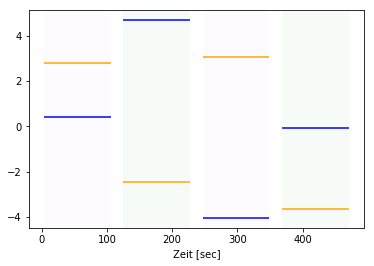

In [21]:
# Plot der Mittelwerte in den Phasen
plot_phases(colors=["violet", "green"], alpha=0.03)
plt.xlabel("Zeit [sec]")
plot_mean_phases(phase_mean1, color="blue")
plot_mean_phases(phase_mean2, color="orange")
plt.savefig("puls_mean_phases.pdf")

In [22]:
# Mittelwerte der Phasen 
mean_1 = (78.746, 83.038, 74.511, 76.613)
mean_2 = (79.679, 77.405, 79.594, 73.424)
stda_1 = (2.786, 2.948, 2.677, 2.673)
stda_2 = (3.171, 2.919, 3.154, 2.600)

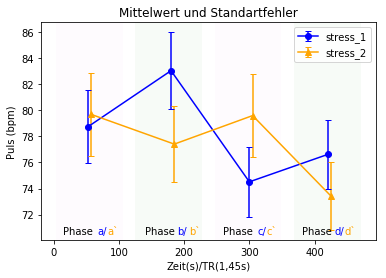

In [23]:
#plot der Mittelwerte und Standartfehler über die Phasen des Experiments hinweg
x_achse = [53,180,300,420,]
x1_achse = [58,185,305,425]
fig, ax = plt.subplots()
plot_phases(colors=["violet", "green"], alpha=0.03)
ax.errorbar(x_achse, mean_1, yerr=stda_1, fmt='-o', capsize=3, label='stress_1', color = 'blue')
ax.errorbar(x1_achse, mean_2, yerr=stda_2, fmt='-^', capsize=3, label= 'stress_2',color = 'orange')
plt.xlabel('Zeit(s)/TR(1,45s)')
plt.text(15, 70.5, 'Phase', fontsize = 10) 
plt.text(67, 70.5, 'a/', fontsize = 10, color = 'blue') 
plt.text(82, 70.5, 'a`', fontsize = 10, color = 'orange') 
plt.text(140, 70.5, 'Phase ', fontsize = 10)
plt.text(190, 70.5, 'b/', fontsize = 10, color = 'blue') 
plt.text(207, 70.5, 'b`', fontsize = 10, color = 'orange') 
plt.text(260, 70.5, 'Phase ', fontsize = 10) 
plt.text(312, 70.5, 'c/', fontsize = 10, color = 'blue') 
plt.text(327, 70.5, 'c`', fontsize = 10, color = 'orange') 
plt.text(380, 70.5, 'Phase ', fontsize = 10)
plt.text(430, 70.5, 'd/', fontsize = 10, color = 'blue') 
plt.text(446, 70.5, 'd`', fontsize = 10, color = 'orange') 
plt.ylabel('Puls (bpm)')
ax.set_title('Mittelwert und Standartfehler')
plt.legend()
plt.savefig("mean_puls.png")

Überprüfung auf Normalverteilung und Transformation der Daten 

/home/jan/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9663724899291992, 0.0)

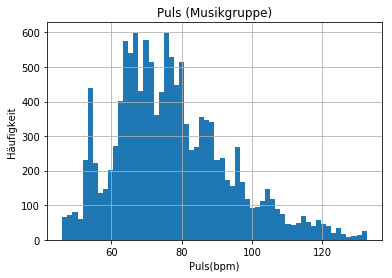

In [24]:
bins = 60
dm.hist(column='Musik_r1_2\t', bins = bins)
plt.title(u"Puls (Musikgruppe)")
plt.xlabel(u"Puls(bpm)")
plt.ylabel(u"Häufigkeit")
plt.savefig(u'puls_musik')
stats.shapiro(dm)

/home/jan/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9679905772209167, 8.267660939516421e-44)

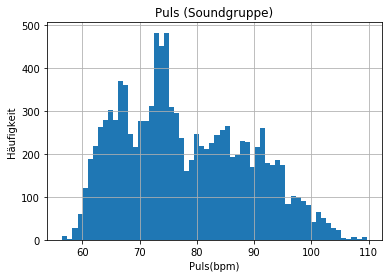

In [25]:
bins = 60
dw.hist(column='sound_run1_2', bins = bins)
plt.title(u"Puls (Soundgruppe)")
plt.xlabel(u"Puls(bpm)")
plt.ylabel(u"Häufigkeit")
plt.savefig(u'puls_sound')
stats.shapiro(dw)

/home/jan/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9757663607597351, 0.0)

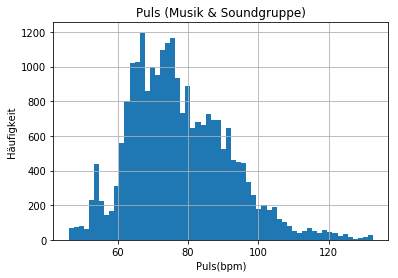

In [26]:
bins = 60
dwm.hist(column='musik_sound_r1_2', bins = bins)
plt.title(u"Puls (Musik & Soundgruppe)")
plt.xlabel(u"Puls(bpm)")
plt.ylabel(u"Häufigkeit")
plt.savefig(u'puls_musik_sound')
stats.shapiro(dwm)

/home/jan/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9966861605644226, 1.926675757152859e-22)

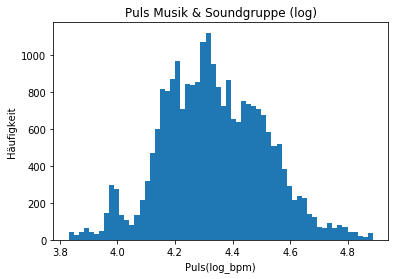

In [27]:
bins = 60
plt.hist(log_dwm, bins = bins)
plt.title(u"Puls Musik & Soundgruppe (log)")
plt.xlabel(u"Puls(log_bpm)")
plt.ylabel(u"Häufigkeit")
plt.savefig(u'puls_musik_sound_log')
stats.shapiro(log_dwm)

/home/jan/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9899584054946899, 2.7251432388907014e-37)

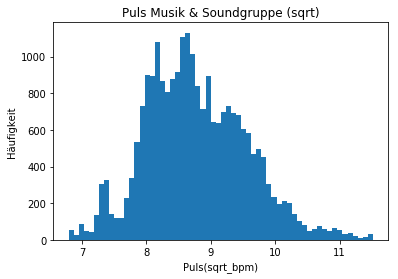

In [28]:
bins = 60
plt.hist(sqrt_dwm, bins = bins)
plt.title(u"Puls Musik & Soundgruppe (sqrt)")
plt.xlabel(u"Puls(sqrt_bpm)")
plt.ylabel(u"Häufigkeit")
plt.savefig(u'puls_musik_sound_sqrt')
stats.shapiro(sqrt_dwm)

In [29]:
original_data = dwm
fitted_data, fitted_lambda = stats.boxcox(dwm)

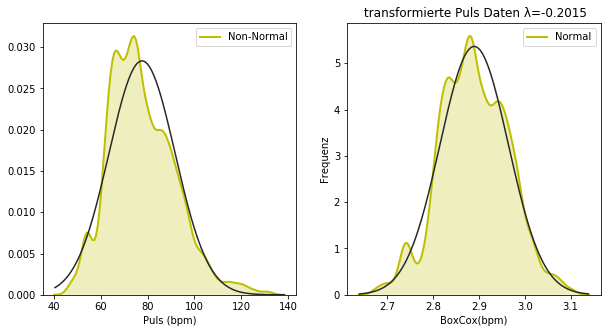

In [30]:
#transformierte Daten mittels Box Cox power Transformation
import seaborn as sns
fig, ax = plt.subplots(1, 2)
sns.distplot(original_data, hist = False, kde = True,fit=norm,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="y",ax = ax[0], axlabel = "Puls (bpm)")

sns.distplot(fitted_data, hist = False, kde = True, fit=norm, 
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="y", ax = ax[1],  axlabel = "BoxCox(bpm)")
  
# adding legends to the subplots
plt.legend(loc = "upper right") 
plt.title(u" transformierte Puls Daten λ=-0.2015")
plt.ylabel(u"Frequenz")  
plt.savefig(u'Puls_normal')
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

In [31]:
fitted_data

array([[2.92121819],
       [2.92121819],
       [2.92121819],
       ...,
       [2.83195478],
       [2.83195478],
       [2.83195478]])

In [32]:
fitted_lambda

array([-0.20153243])

In [33]:
#Prüfung der Normalverteilung aufgrund des D’Agostino and Pearson’s test
k2, p = stats.normaltest(fitted_data)
alpha = 0.05
print(p)

[0.09209656]


In [34]:
if p < alpha:  # null hypothesis: x comes from a normal distribution

    print("die Nullhypothese kann abgelehnt werden")

else:

    print("die Null Hypothese muss nicht abgelehnt werden")
#The null hypothesis can be rejected

die Null Hypothese muss nicht abgelehnt werden


In [35]:
df_mc.to_excel('output1.xlsx', engine='xlsxwriter') 
df_mc_wneg = df_mc +2.87
df_mc_wneg.min()

p10:1    0.943648
p11:1    1.416149
p12:1    1.196628
p13:1    1.297268
p14:1    0.164187
p15:1    0.962136
p16:1    1.162887
p17:1    0.641576
p19:1    1.167778
p20:1    0.602975
p21:1    1.587510
p22:1    1.349666
p25:1    1.512987
p26:1    1.138024
p27:1    0.491726
p28:1    1.184239
p29:1    1.390510
p2:1     1.309946
p3:1     1.385733
p5:1     0.971756
p6:1     0.832769
p7:1     0.558483
p9:1     1.087047
p10:2    1.347743
p11:2    1.000542
p12:2    1.111111
p13:2    1.322638
p14:2    0.813555
p15:2    0.813555
p16:2    1.241343
p17:2    0.577932
p19:2    1.518034
p20:2    0.007951
p21:2    0.509428
p22:2    0.975276
p25:2    0.932510
p26:2    1.190575
p27:2    1.061806
p28:2    1.393019
p29:2    1.450973
p2:2     0.290935
p3:2     1.492254
p5:2     1.226611
p6:2     1.489004
p7:2     1.156023
p9:2     1.000986
dtype: float64

In [36]:
lmbda = -0.2015
z = (df_mc_wneg**lmbda -1) / lmbda 
z

,p10:1,p11:1,p12:1,p13:1,p14:1,p15:1,p16:1,p17:1,p19:1,p20:1,...,p26:2,p27:2,p28:2,p29:2,p2:2,p3:2,p5:2,p6:2,p7:2,p9:2
0,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
1,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
2,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
3,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
4,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
5,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
6,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
7,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
8,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
9,1.075480,1.109571,1.331949,1.233225,0.770371,0.337312,1.294367,1.184657,0.438363,1.313140,...,0.893913,0.743484,1.051621,0.873981,1.220165,0.560229,1.363738,1.123166,1.002950,0.000985
